In [2]:
import tensorflow as tf
import numpy as np
import os
import librosa


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [42]:
import os
import librosa

audio_files_dir = r'archive\16000_pcm_speeches'
audio_data = []
sr_audios = []
for root, dirs, files in os.walk(audio_files_dir):
  for file in files:
    if file.endswith(".wav"):
      file_path = os.path.join(root, file)
      data, sr = librosa.load(file_path, sr=None)
      sr_audios.append(sr)
      audio_data.append(data)


In [40]:
print(audio_data[1])

[ 0.00396729 -0.00119019 -0.00973511 ...  0.20730591  0.18551636
  0.1104126 ]


[7501, 1, 1, 1, 1, 1, 1]


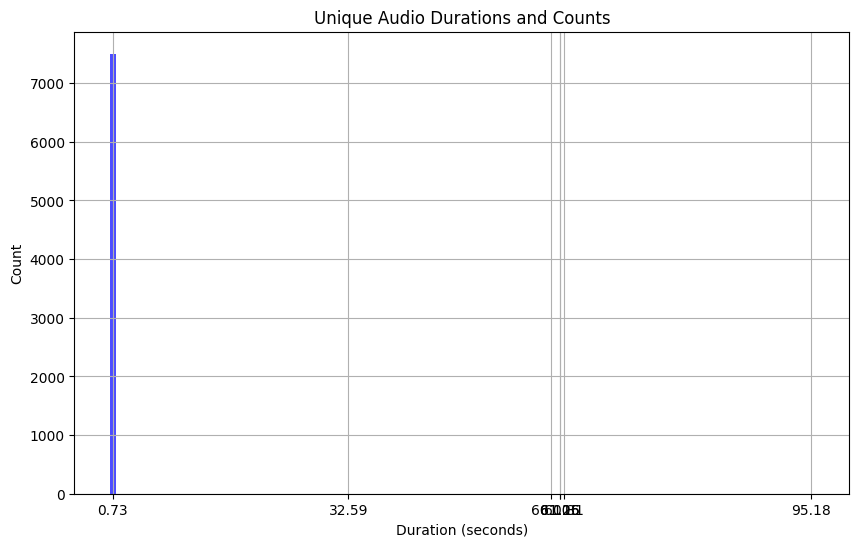

[ 0.72562358 32.58566893 60.         61.1555102  61.25387755 61.80571429
 95.18312925]


In [47]:
import matplotlib.pyplot as plt
from collections import Counter

# Calculate the duration of each audio clip in seconds
audio_durations = [len(data) / sr for data in audio_data]

duration_counts = Counter(audio_durations)

unique_durations = list(duration_counts.keys())
counts = list(duration_counts.values())

print(counts)
# Create a bar chart to visualize unique audio durations and their counts
plt.figure(figsize=(10, 6))
plt.bar(unique_durations, counts, color='blue', alpha=0.7)
plt.title('Unique Audio Durations and Counts')
plt.xticks(np.unique(audio_durations))
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()
print((np.unique(audio_durations)))

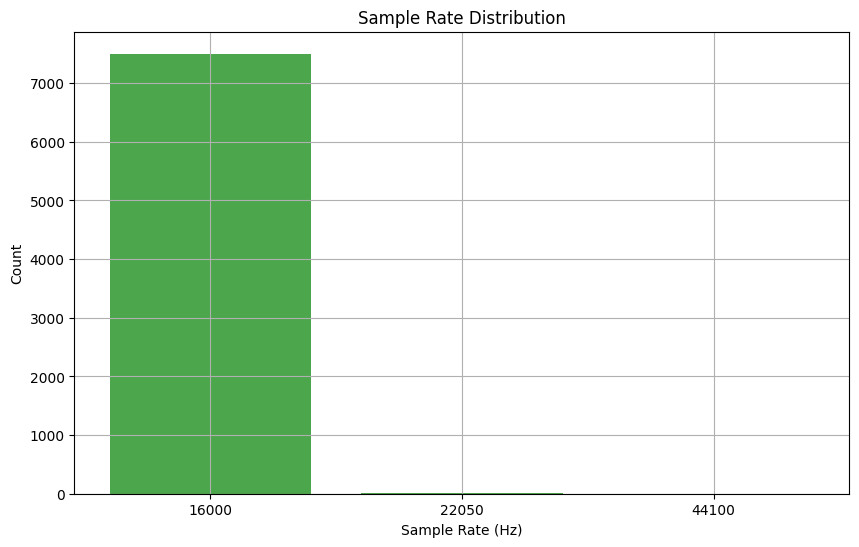

In [48]:
import matplotlib.pyplot as plt
from collections import Counter

# Extract sample rates from the audio data
sample_rates = sr_audios

# Count the occurrences of each sample rate
sample_rate_counts = Counter(sample_rates)

# Extract unique sample rates and their counts
unique_sample_rates = list(sample_rate_counts.keys())

counts = list(sample_rate_counts.values())
# plt.figure(figsize=(10, 6))
# Create a bar plot with custom X-axis labels
plt.figure(figsize=(10, 6))
plt.bar(range(len(unique_sample_rates)), counts, color='green', alpha=0.7)
plt.title('Sample Rate Distribution')
plt.xlabel('Sample Rate (Hz)')
plt.ylabel('Count')
plt.xticks(range(len(unique_sample_rates)), unique_sample_rates)  # Set custom X-axis labels
plt.grid(True)
plt.show()



In [44]:
print(unique_sample_rates)
print(counts)

[16000, 22050, 44100]
[7501, 5, 1]
